## Objetivo General
 
Aprender a preparar datos reales (numéricos e imágenes) para redes neuronales.

**Datasets utilizados:**
- **Iris:** datos numéricos de flores.
- **MNIST:** imágenes de dígitos escritos a mano.

### PASO 1: Importaciones necesarias
Permiten trabajar con datos (`pandas`), gráficos (`matplotlib`, `seaborn`), y cargar datasets (`sklearn`, `tensorflow`).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist


### PASO 2: Cargar y explorar el dataset IRIS
Cargamos el dataset Iris, visualizamos sus datos y los graficamos.

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target


Creamos un DataFrame con los datos de las flores (sépalos y pétalos).

In [3]:
print(iris_df.head())      # primeras filas
print(iris_df.info())      # tipo de datos
print(iris_df.describe())  # estadísticas básicas


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes:

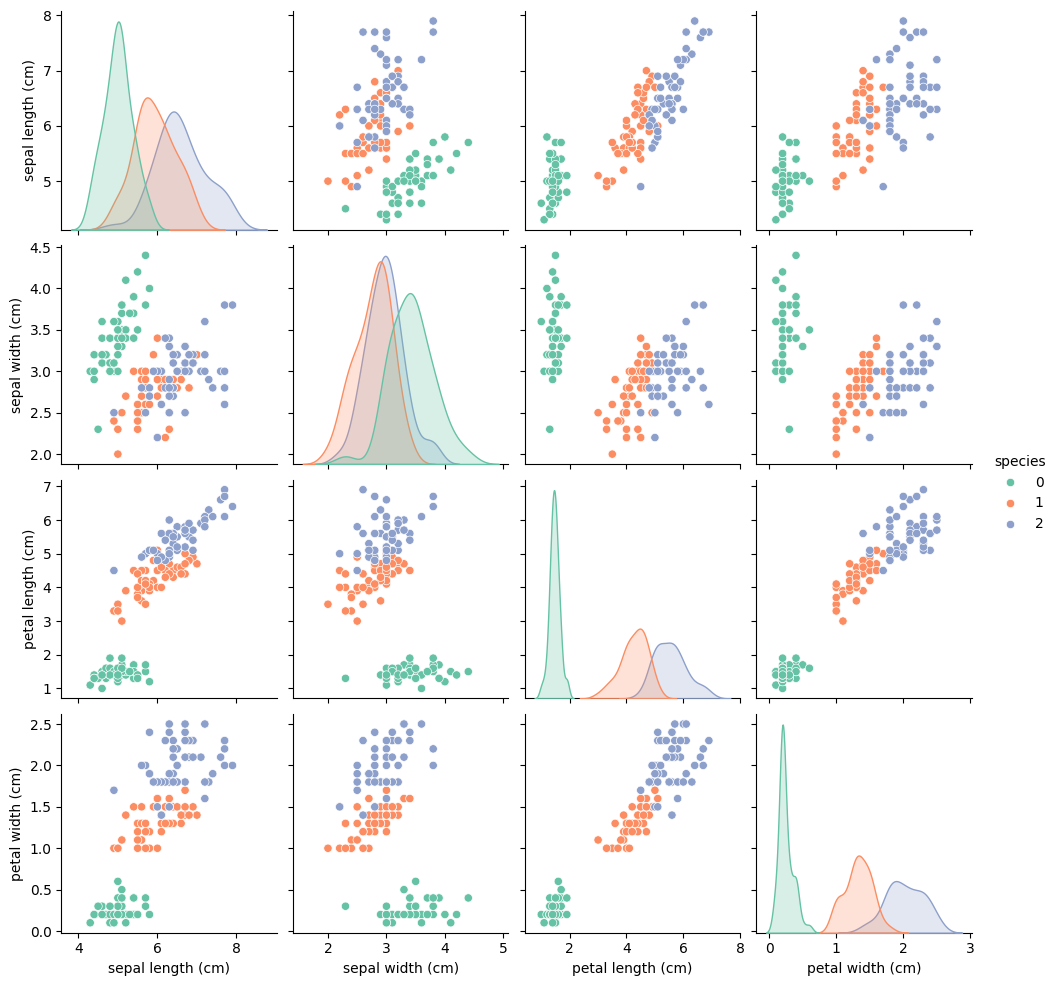

In [4]:
sns.pairplot(iris_df, hue="species", palette="Set2")
plt.show()


El gráfico muestra cómo las variables se separan entre especies.
El largo y ancho del pétalo son las variables que mejor distinguen las flores.

### PASO 3: Cargar y visualizar el dataset MNIST

Cargamos las imágenes de dígitos escritos a mano (0–9).

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)


Forma de X_train: (60000, 28, 28)
Forma de X_test: (10000, 28, 28)


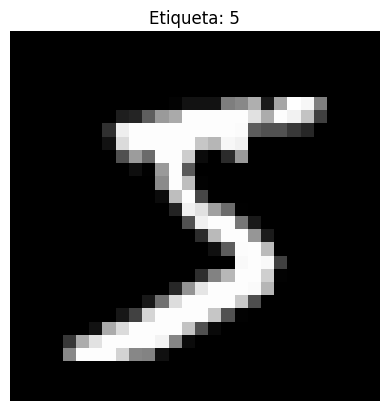

In [8]:
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Etiqueta: {y_train[0]}")
plt.axis("off")
plt.show()


### PASO 4: Normalizar y dividir los datos

Es importante que los valores estén entre 0 y 1 para que la red neuronal aprenda mejor.

In [9]:
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1])  # sin la columna species
X = iris_scaled
y = iris_df["species"]


**Modificación solicitada:** Cambia el valor del parámetro `test_size` de `0.2` a `0.3`.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


- `test_size=0.2`: usa el 20% de los datos para prueba y 80% para entrenamiento.
- `test_size=0.3`: usa el 30% para prueba y 70% para entrenamiento.
Así, el modelo aprende con menos datos, pero se evalúa con más ejemplos.

In [11]:
print("Tamaño de entrenamiento:", X_train.shape[0])
print("Tamaño de prueba:", X_test.shape[0])


Tamaño de entrenamiento: 105
Tamaño de prueba: 45


Normalicemos las imágenes (dividir entre 255 para que los valores estén entre 0 y 1).

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0
